In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # from chapter_2 -> project root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from sklearn.svm import SVC

In [8]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)  # calculate mean and std
X_train_std = sc.transform(X_train)  # transform
X_test_std = sc.transform(X_test)  # transform based on train mean and std

In [12]:
svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train_std, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == cl, 0],


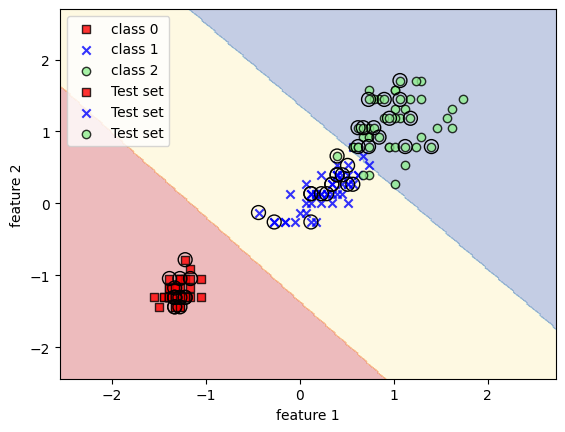

In [14]:
from visualization.visualization import plot_decision_regions, plot_data_universtal

plot_decision_regions(X_train_std, y_train, classifier=svm)
plot_data_universtal(X_train_std, y_train, X_test=X_test_std, y_test=y_test)

### Solving nonlinear problems

In [21]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

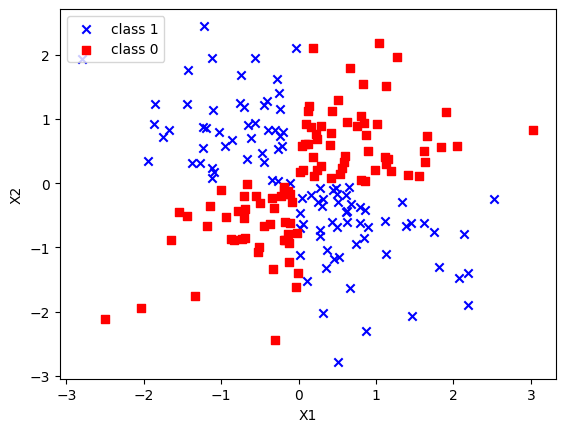

In [24]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='r', marker='s', label='class 0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


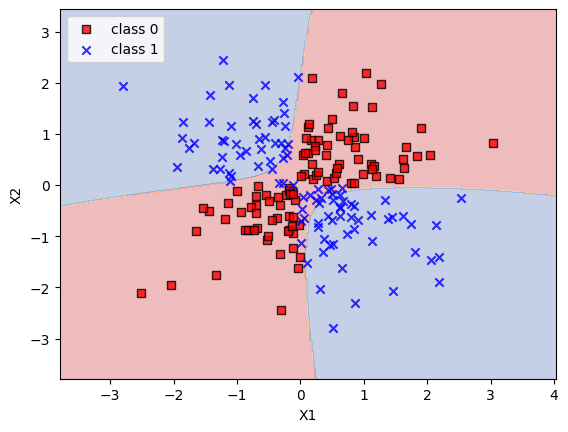

In [27]:
svm = SVC(kernel="rbf", random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plot_data_universtal(X_xor, y_xor)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

### Iris dataset example

/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == cl, 0],


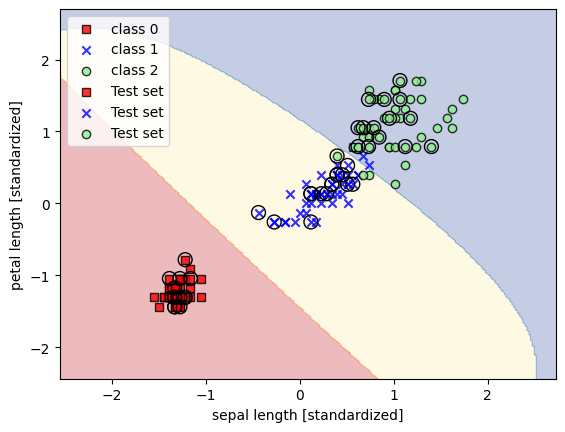

In [28]:
svm = SVC(kernel="rbf", random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, classifier=svm)
plot_data_universtal(X_train_std, y_train, X_test=X_test_std, y_test=y_test)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

### To high gamma

/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == cl, 0],


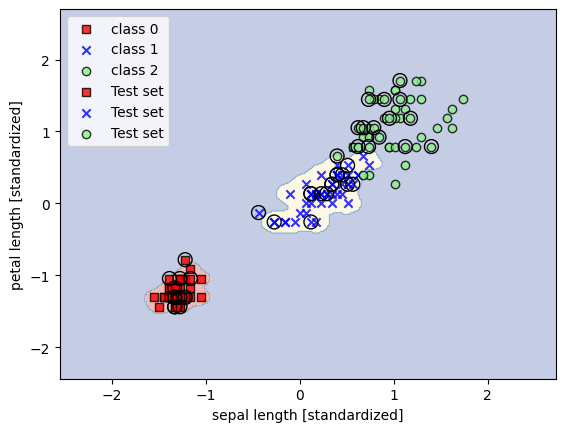

In [29]:
svm = SVC(kernel="rbf", random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, classifier=svm)
plot_data_universtal(X_train_std, y_train, X_test=X_test_std, y_test=y_test)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()